In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy.stats as st

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.SQLite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect= True)
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [6]:
# Save references to each table
Measure = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [8]:
# Find the most recent date in the data set.
recent = session.query(Measure.date).order_by(Measure.date.desc()).first()
recent


('2017-08-23')

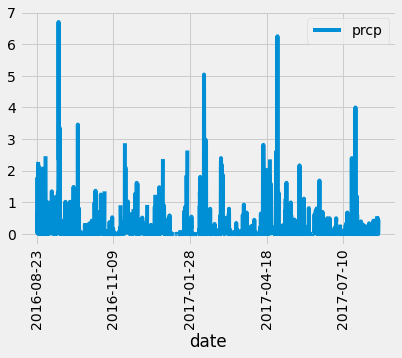

In [9]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# for row in session.query(Measure.date, Measure.prcp).order_by(Measurement.date.desc()).limit(12):
#     print(row)
# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days= 365)
# year_ago

# Perform a query to retrieve the data and precipitation scores
data= session.query(Measure.date, Measure.prcp).filter(Measure.date >= year_ago).all()
# data
# Save the query results as a Pandas DataFrame and set the index to the date column
yrly_prcp = pd.DataFrame(data)
# yrly_prcp
# Sort the dataframe by date
date_df = yrly_prcp.sort_values("date")
# date_df
# Use Pandas Plotting with Matplotlib to plot the data

date_df.plot(x= "date", y="prcp", rot= 90)
plt.show()

In [10]:
# Use Pandas to calcualte the summary statistics for the precipitation data
# correlation = st.pearsonr(date_df.[()"date")], date_df.[("prcp")])
# print(correlation)

# regress_model = st.linregress(Measure.date, Measure.prcp)
# regress_model
date_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [11]:
# Design a query to calculate the total number stations in the dataset
num_of_station= session.query(Station.station).count()
num_of_station

9

In [12]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


active_stations= session.query(Measure.station, func.count(Measure.station)).\
    group_by(Measure.station).\
    order_by(func.count(Measure.station).desc()).all()

active_stations
# session.query(Measure.station, func.count(Measure.station)).group_by(Measure.station).order_by(func.count(Measure.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [13]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# max_temp= session.query(func.max(Measure.tobs)).\
#     filter(Measure.station == 'USC00519281').all()
# #     filter(Measure.station == 'USC00519281')
# # max_temp
# # max_temp

# # #min temp
# min_temp= session.query(func.min(Measure.tobs)).\
#     filter(Measure.station == 'USC00519281').all()
# min_temp

# # #avg temp

# avg_temp= session.query(func.avg(Measure.tobs)).\
#     filter(Measure.station == 'USC00519281').all()
# avg_temp

session.query(func.min(Measure.tobs), func.max(Measure.tobs), func.avg(Measure.tobs)).\
    filter(Measure.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, -1.340000000000014, 'Temperature')

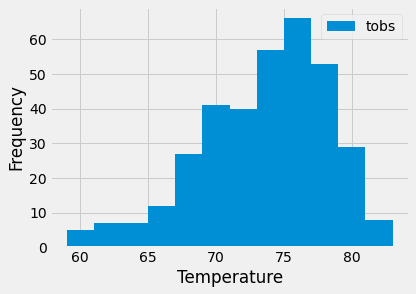

In [14]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

import datetime as dt
from pandas.plotting import table

prev_year = dt.date(2017, 8, 23) - dt.timedelta(days = 365)

results = session.query(Measure.tobs).\
    filter(Measure.station == 'USC00519281').\
    filter(Measure.date >= prev_year).all()

df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel("Temperature")

# Close session

In [15]:
# Close Session
session.close()